### **Разведочный анализ данных. Исследование и визуализация данных.**

#### **1) Текстовое описание набора данных**

Выбранный датасет содержит данные, которые являются результатом химического анализа вин, выращенных в одном регионе Италии, но полученных из трех разных сортов. Анализ определил количество 13 компонентов, содержащихся в каждом из трех типов вин. - [Источник](https://archive.ics.uci.edu/ml/datasets/Wine)

Датасет состоит из одного файла wine.data

В файле содержатся следующие колонки:


*   Alcohol - крепость
*   Malic acid - яблочная кислота
*   Ash - неорганические вещества
*   Alcalinity of ash - щелочность неорганических веществ
*   Magnesium - магний
*   Total phenols - содержание полифенолов
*   Flavanoids - содержание флавоноидов
*   Nonflavanoid phenols - нефлавоноидные фенолы
*   Proanthocyanins - проантоцианиды
*   Color intensity - интенсивность цвета
*   Hue - оттенок
*   OD280/OD315 of diluted wines - OD280/OD315 разбавленных вин (метод определения концентрации белка)
*   Proline - пролин


### **Импорт библиотек**

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.datasets import *
%matplotlib inline 
sns.set(style="ticks")

### **Загрузка данных**

In [16]:
uploaded = files.upload()

Saving wine.data to wine.data


In [20]:
wine = load_wine()

In [21]:
type(wine)

sklearn.utils.Bunch

In [22]:
# Датасет возвращается в виде словаря со следующими ключами
for key in wine:
    print(key)

data
target
target_names
DESCR
feature_names


In [23]:
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [24]:
# Список колонок
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [25]:
# Размерность данных
wine['data'].shape

(178, 13)

In [26]:
# Размерность целевого признака
wine['target'].shape

(178,)

In [27]:
data = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

#### **2) Основные характеристики датасета**

Первые пять строк датасета

In [29]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


Размер датасета (кол-во строк, кол-во колонок)

In [30]:
data.shape

(178, 14)

In [31]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 178


Список колонок

In [32]:
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

Список колонок с типами данных

In [33]:
data.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

Проверка на наличие пустых значений

In [34]:
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

alcohol - 0
malic_acid - 0
ash - 0
alcalinity_of_ash - 0
magnesium - 0
total_phenols - 0
flavanoids - 0
nonflavanoid_phenols - 0
proanthocyanins - 0
color_intensity - 0
hue - 0
od280/od315_of_diluted_wines - 0
proline - 0
target - 0


Основные статистические характеристики датасета

In [35]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Уникальные значения для целевого признака

In [36]:
data['target'].unique()

array([0., 1., 2.])

### **3)Визуальное исследование датасета**

С помощью диаграммы распределения посмотрим на зависимость между крепостью вина и содержанием яблочной кислоты.

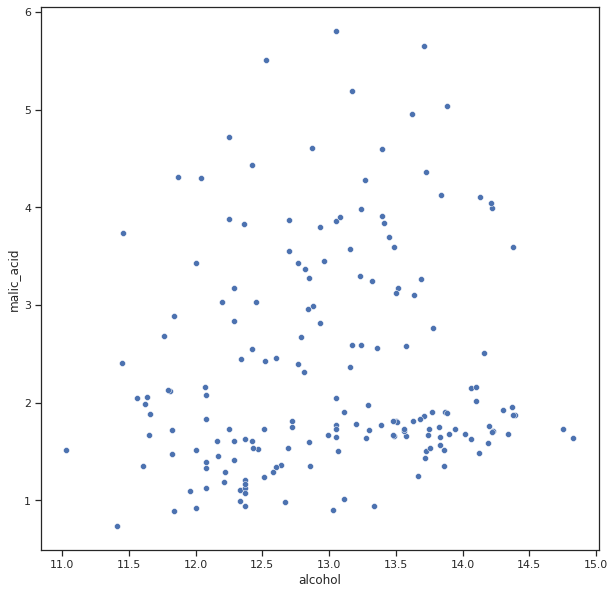

In [61]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='alcohol', y='malic_acid', data=data)

Посмотрим насколько на эту зависимость влияет целевой признак.

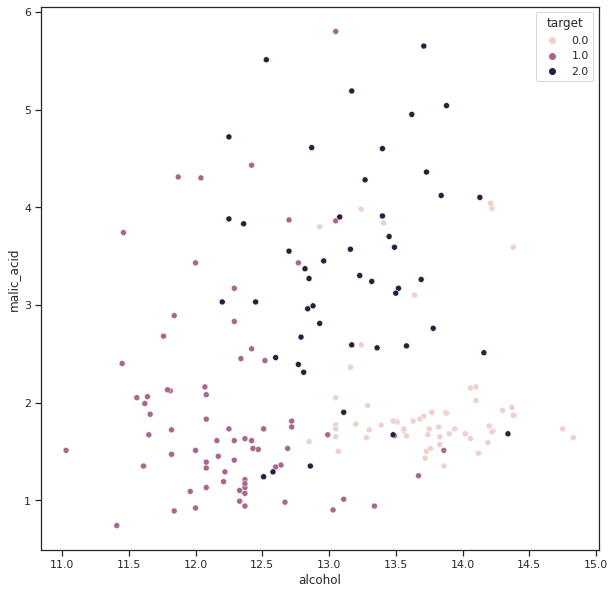

In [62]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='alcohol', y='malic_acid', hue='target', data=data)

Оценим плотность вероятности распределения содержания яблочной кислоты.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


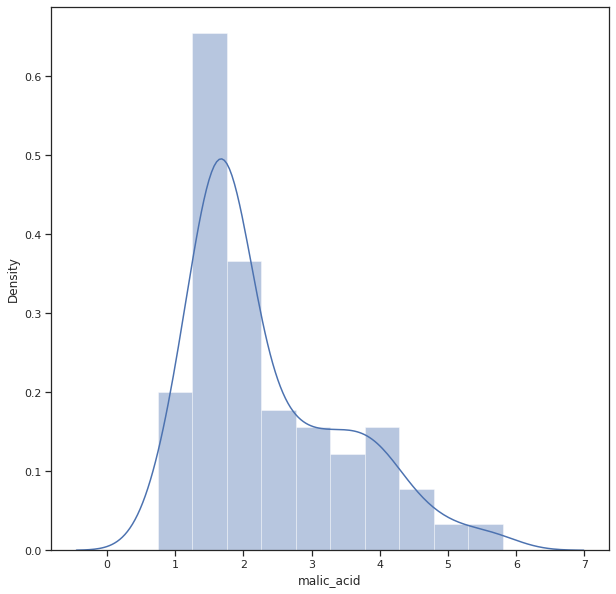

In [45]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['malic_acid'])

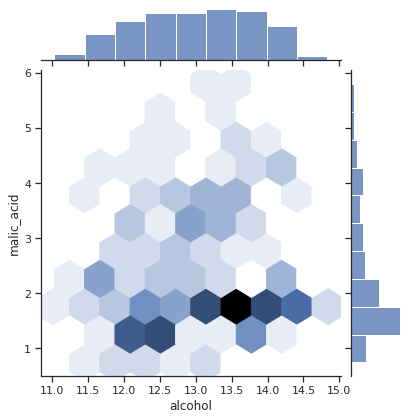

In [46]:
sns.jointplot(x='alcohol', y='malic_acid', data=data, kind="hex")

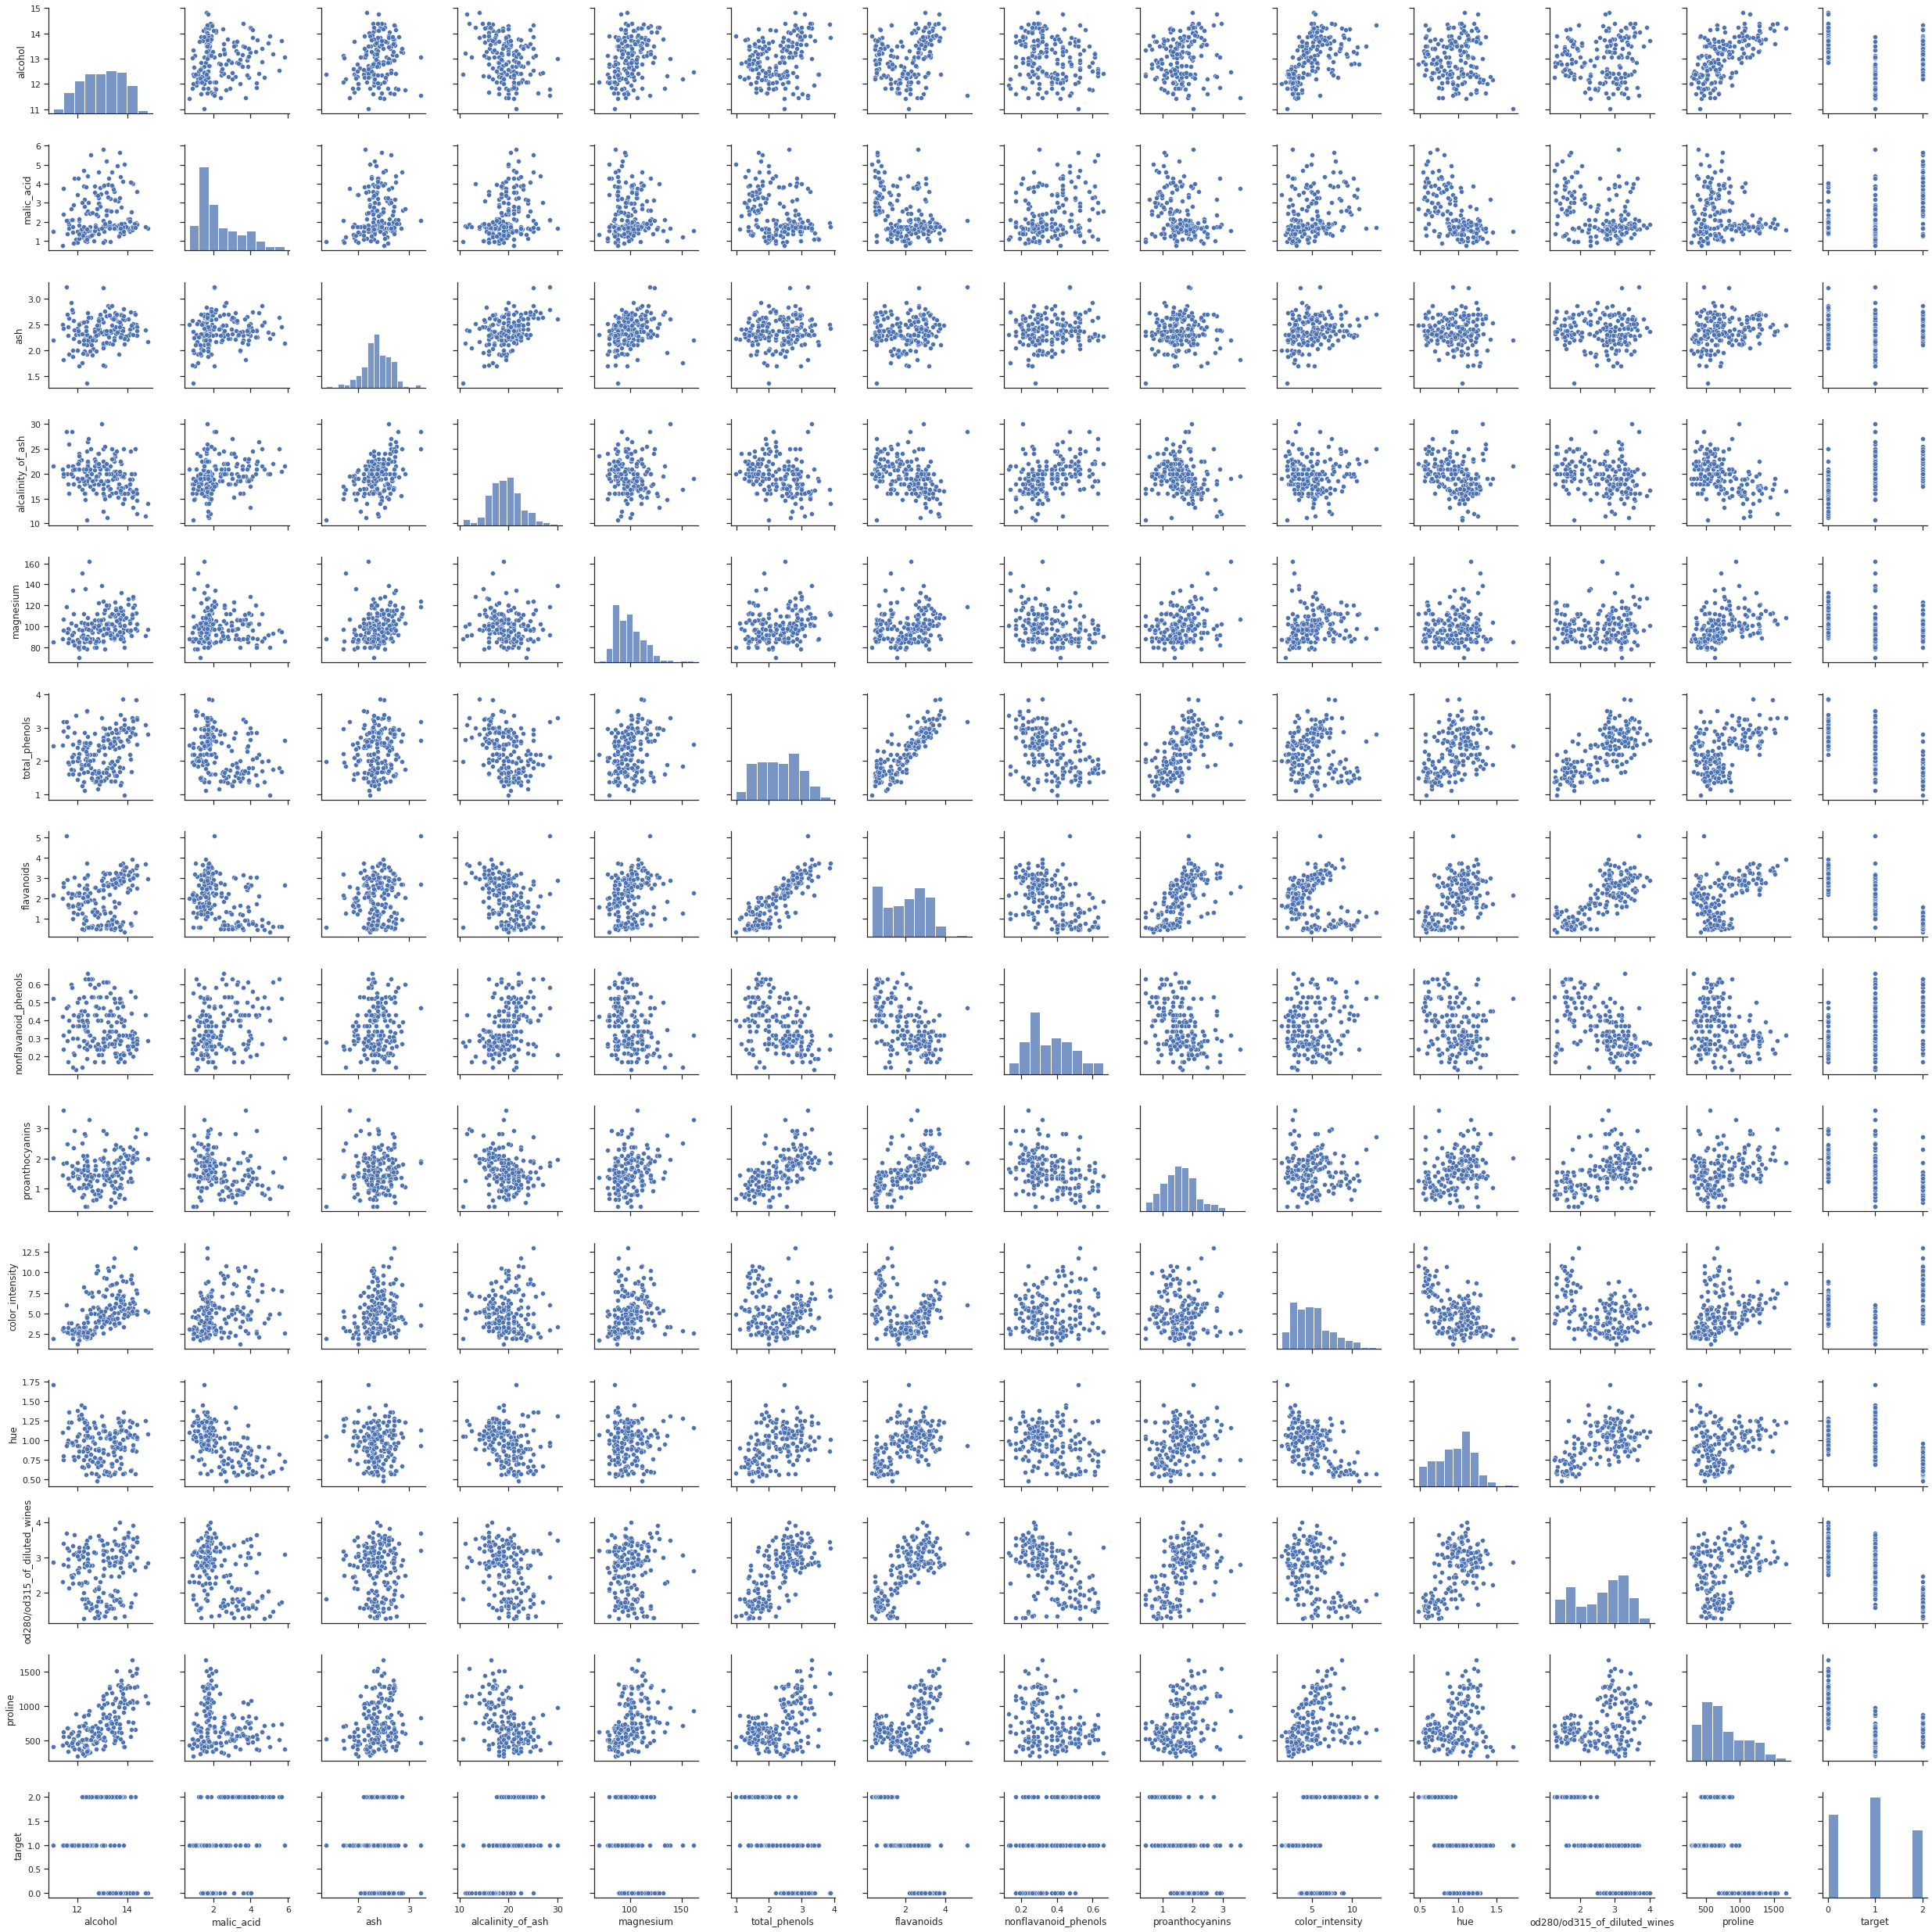

In [47]:
sns.pairplot(data)

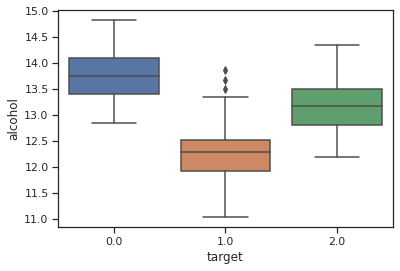

In [48]:
sns.boxplot(x='target', y='alcohol', data=data)

### **4) Информация о корреляции признаков**

Построим матрицу корреляций.

In [49]:
data.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


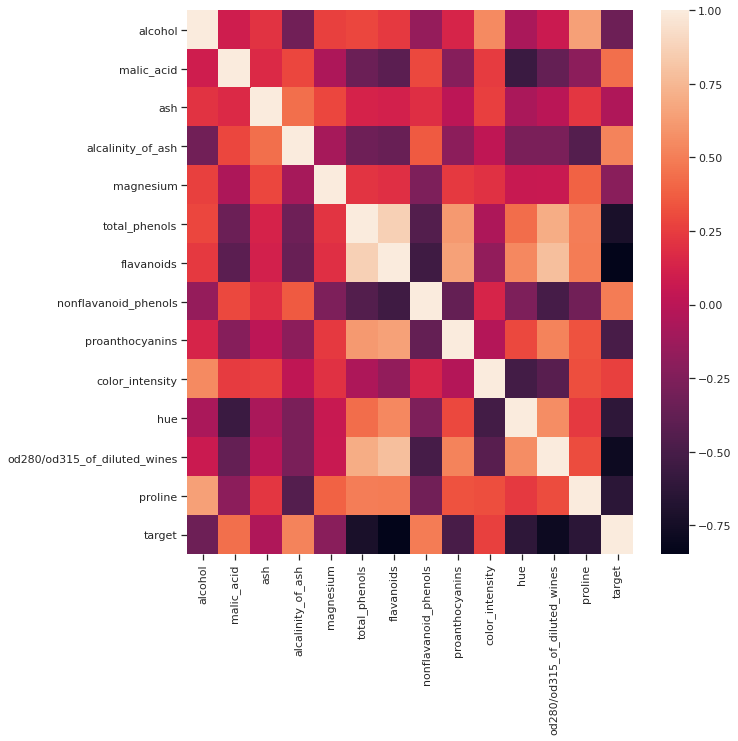

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr())

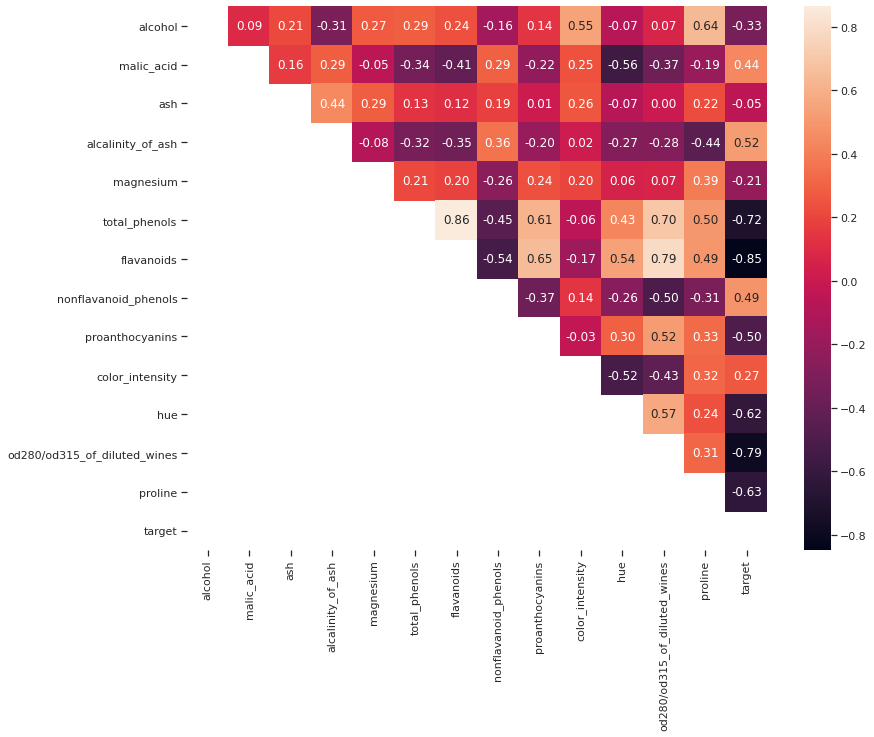

In [60]:
# Вывод значений в ячейках
fig, ax = plt.subplots(figsize=(13,10))
mask = np.zeros_like(data.corr(), dtype=bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.2f')

Отрицательный коэффициент корреляции показывает, что две переменные могут быть связаны таким образом, что при возрастании значений одной из них значения другой убывают.

На основе корреляционной матрицы, вузализированной с помощью тепловой карты, можно сделать следующие выводы:


*   Целевой признак наиболее сильно коррелирует с содержанием флаваноидов (-0.85)
*   Вторым по коэффициенту корреляции с целевым признаком является концентрация белка (-0.79). Однако концентрация белка сильно коррелирует с содержанием флаваноидов (0.79), поэтому из модели можно исключить один из признаков. Лучше исключить концентрацию белка, т.к. он меньше коррелирует с целевым признаком, чем содержание флаваноидов, однако разница между -0.85 и -0.79 небольшая, поэтому данный вывод не является надежным.
*   Также с целевым признаком достаточно сильно коррелирует содержание фенола (-0.72), однако его стоит исключить из модели, так как содержание фенола достаточно сильно коррелирует с содержанием флавоноидов (0.86).
*   Целевой признак слабо коррелирует с содержанием неорганических веществ (-0.05), содержанием магния (-0.21) и интенсивностью цвета (0.27), поэтому стоит исключить эти признаки из модели.
*   Целевой признак достаточно сильно коррелирует с оттенком (-0.62) и пролин(-0.63), оставим их в модели.
*   Крепость достаточно сильно коррелирует с пролином (0.64) и слабо коррелирует с целевым признаком (-0.33), поэтому исключаем ее из модели.
*   Яблочная кислота достаточно сильно коррелирует с оттенком (-0.56) и отчасти коррелирует с целевым признаком (0.44), поэтому возможно лучше исключить ее из модели для лучшего результата.
*   Целевой признак отчасти коррелирует с щелочностью неорганических веществ (0.52), оставим его в модели.
*   Целевой признак отчасти коррелирует с нефлавоноидными фенолами (0.49) и проантоцианидами (-0.50), однако оба эти признако достаточно сильно коррелируют с содержанием флаваноидов: -0.54 и 0.65 соотвественно, поэтому возможно лучше исключить их из модели для лучшего результата.

